In [1]:
pip install fiftyone


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset("quickstart")
session = fo.launch_app(dataset)

Dataset already downloaded
Loading existing dataset 'quickstart'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [9]:
pip install umap-learn>=0.5

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install torch

  Using cached torch-2.5.1-cp39-cp39-win_amd64.whl.metadata (28 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2024.12.0-py3-none-any.whl.metadata (11 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached torch-2.5.1-cp39-cp39-win_amd64.whl (203.0 MB)
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
Using cached filelock-3.16.1-py3-none-any.whl (16 kB)
Using cached fsspec-2024.12.0-py3-none-any.whl (183 kB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install torchvision

  Using cached torchvision-0.20.1-cp39-cp39-win_amd64.whl.metadata (6.2 kB)
Using cached torchvision-0.20.1-cp39-cp39-win_amd64.whl (1.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import fiftyone as fo
import fiftyone.brain as fob
import fiftyone.zoo as foz
dataset = foz.load_zoo_dataset("quickstart")
# Image embeddings
fob.compute_visualization(dataset, brain_key="img_viz")
# Object patch embeddings
fob.compute_visualization(
    dataset, patches_field="ground_truth", brain_key="gt_viz"
)


Dataset already downloaded
Loading existing dataset 'quickstart'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
Computing embeddings...
 100% |█████████████████| 200/200 [15.0s elapsed, 0s remaining, 14.0 samples/s]      
Generating visualization...


TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [4]:
pip install fiftyone


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install torch torchvision


Note: you may need to restart the kernel to use updated packages.


In [2]:

# Path to your folder with images (replace with your folder's path)
import fiftyone as fo
import fiftyone.zoo as foz
import torch
import torchvision.transforms as T
from torchvision.models import resnet50
import numpy as np
from tqdm import tqdm
import os

# Path to your folder with images (replace with your folder's path)
base_path = r"data\multi-class-knee-osteoporosis-x-ray-dataset\archive"

# Load the dataset from subfolders
dataset = fo.Dataset.from_dir(
    dataset_dir=base_path,
    dataset_type=fo.types.ImageClassificationDirectoryTree,
    name="image_classification_dataset2"
)

# Display the dataset to ensure it's loaded correctly
session = fo.launch_app(dataset)

# Load a pre-trained ResNet50 model
model = resnet50(pretrained=True)
model.eval()

# Remove the final classification layer to use the embeddings
model = torch.nn.Sequential(*list(model.children())[:-1])

# Define the image transformation pipeline
transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to compute embeddings
def compute_embedding(filepath):
    image = T.functional.to_pil_image(fo.utils.cv.imread(filepath))
    input_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        embedding = model(input_tensor)
    return embedding.squeeze().numpy()

# Generate embeddings for all samples
print("Generating embeddings...")
embeddings = []
for sample in tqdm(dataset):
    embedding = compute_embedding(sample.filepath)
    sample["embedding"] = embedding.tolist()  # Convert to list for JSON serialization
    embeddings.append(embedding)
    sample.save()

# Visualize embeddings in FiftyOne App
print("Visualizing embeddings...")
embeddings = np.vstack(embeddings)  # Stack all embeddings
plot = fo.plot_embeddings(
    dataset,
    embeddings=embeddings,
    labels=list(dataset.values("ground_truth.label")),
)

session.plots.attach(plot)

# Keep the app running
session.wait()


ValueError: Dataset name 'image_classification_dataset2' is not available

In [3]:
pip install fiftyone torch torchvision pillow tqdm


Note: you may need to restart the kernel to use updated packages.


In [9]:
import fiftyone as fo

# Check if the dataset already exists
if "image_classification_dataset" in fo.list_datasets():
    print("Deleting existing dataset...")
    fo.delete_dataset("image_classification_dataset")

Deleting existing dataset...


 100% |███████████████| 1007/1007 [265.9ms elapsed, 0s remaining, 3.8K samples/s]      



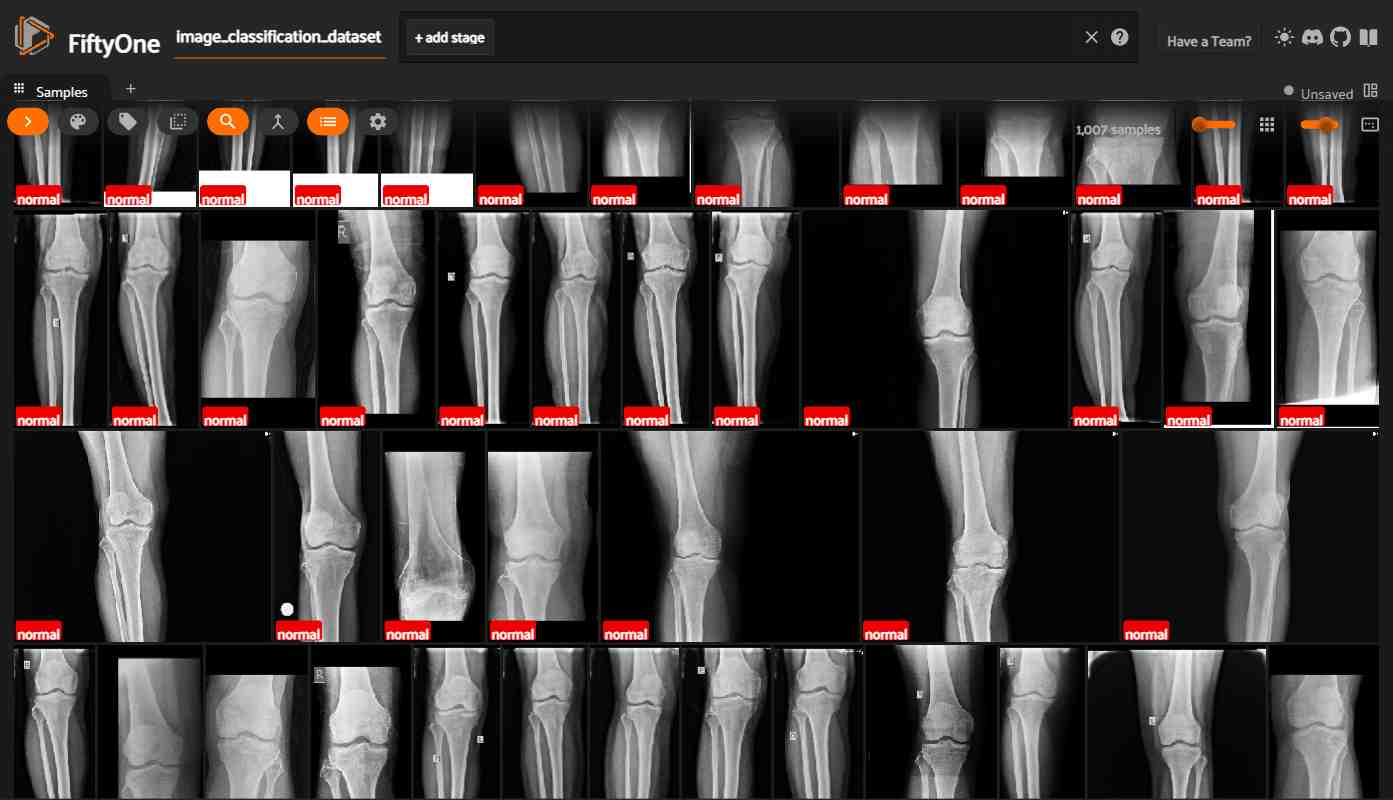

c:\Users\e0l07sq\Anaconda3\envs\osteo_gpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\e0l07sq\Anaconda3\envs\osteo_gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Generating embeddings...


100%|██████████| 1007/1007 [02:29<00:00,  6.72it/s]

Visualizing embeddings...


AttributeError: module 'fiftyone' has no attribute 'plot_embeddings'

In [10]:
import fiftyone as fo
import fiftyone.zoo as foz
import torch
import torchvision.transforms as T
from torchvision.models import resnet50
from PIL import Image
import numpy as np
from tqdm import tqdm
import os

# Path to your folder with images (replace with your folder's path)
base_path = r"data\multi-class-knee-osteoporosis-x-ray-dataset\archive"

# Load the dataset from subfolders
dataset = fo.Dataset.from_dir(
    dataset_dir=base_path,
    dataset_type=fo.types.ImageClassificationDirectoryTree,
    name="image_classification_dataset"
)

# Display the dataset to ensure it's loaded correctly
session = fo.launch_app(dataset)

# Load a pre-trained ResNet50 model
model = resnet50(pretrained=True)
model.eval()

# Remove the final classification layer to use the embeddings
model = torch.nn.Sequential(*list(model.children())[:-1])

# Define the image transformation pipeline
transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to compute embeddings
def compute_embedding(filepath):
    # Load the image using Pillow
    image = Image.open(filepath).convert("RGB")
    input_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        embedding = model(input_tensor)
    return embedding.squeeze().numpy()

# Generate embeddings for all samples
print("Generating embeddings...")
embeddings = []
for sample in tqdm(dataset):
    embedding = compute_embedding(sample.filepath)
    sample["embedding"] = embedding.tolist()  # Convert to list for JSON serialization
    embeddings.append(embedding)
    sample.save()

# Visualize embeddings in FiftyOne App
print("Visualizing embeddings...")
embeddings = np.vstack(embeddings)  # Stack all embeddings
plot = fo.plot_embeddings(
    dataset,
    embeddings=embeddings,
    labels=list(dataset.values("ground_truth.label")),
)

session.plots.attach(plot)

# Keep the app running
session.wait()


In [ ]:
pip install fiftyone torch torchvision scikit-learn pillow tqdm


Deleting existing dataset...
 100% |███████████████| 1007/1007 [398.1ms elapsed, 0s remaining, 2.5K samples/s]      


Generating embeddings...


100%|██████████| 1007/1007 [02:25<00:00,  6.93it/s]


Performing t-SNE...



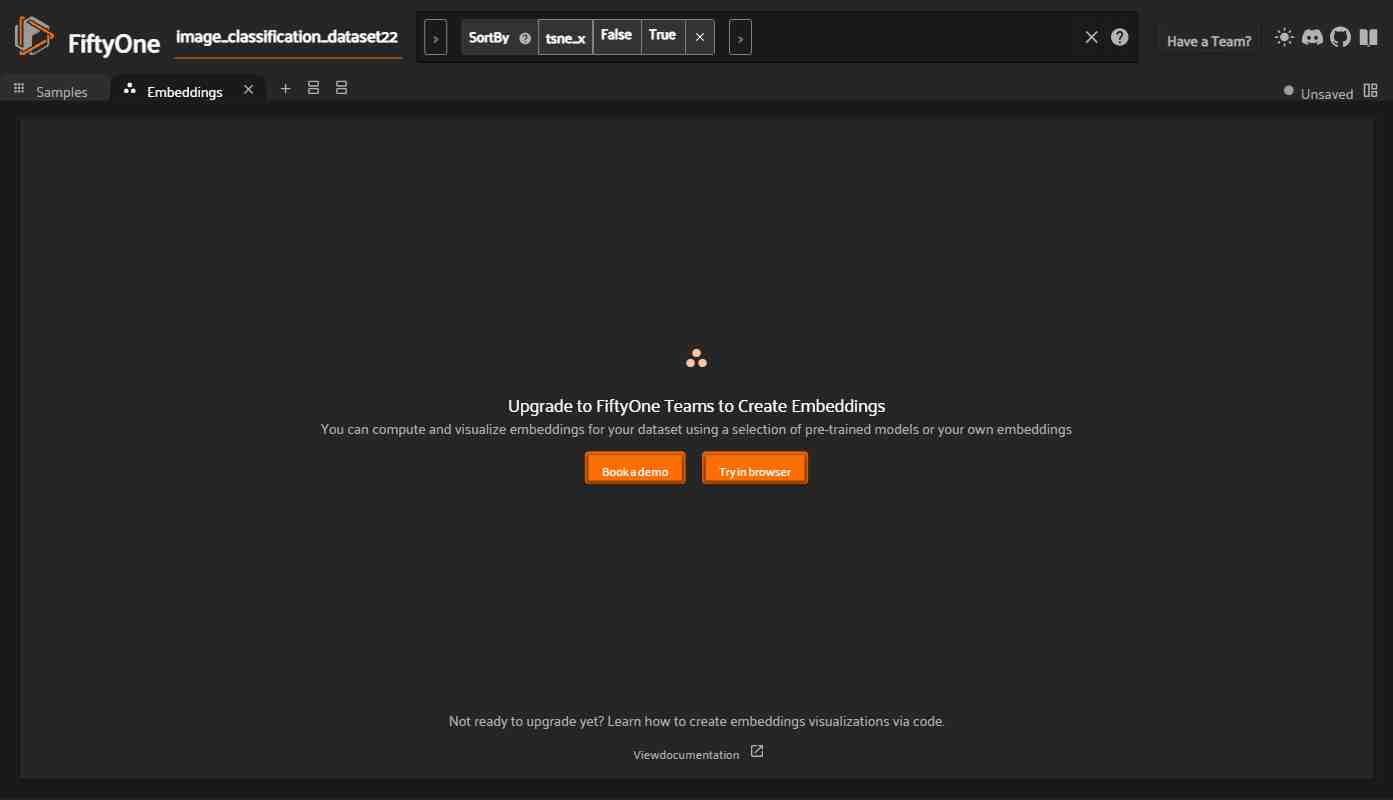


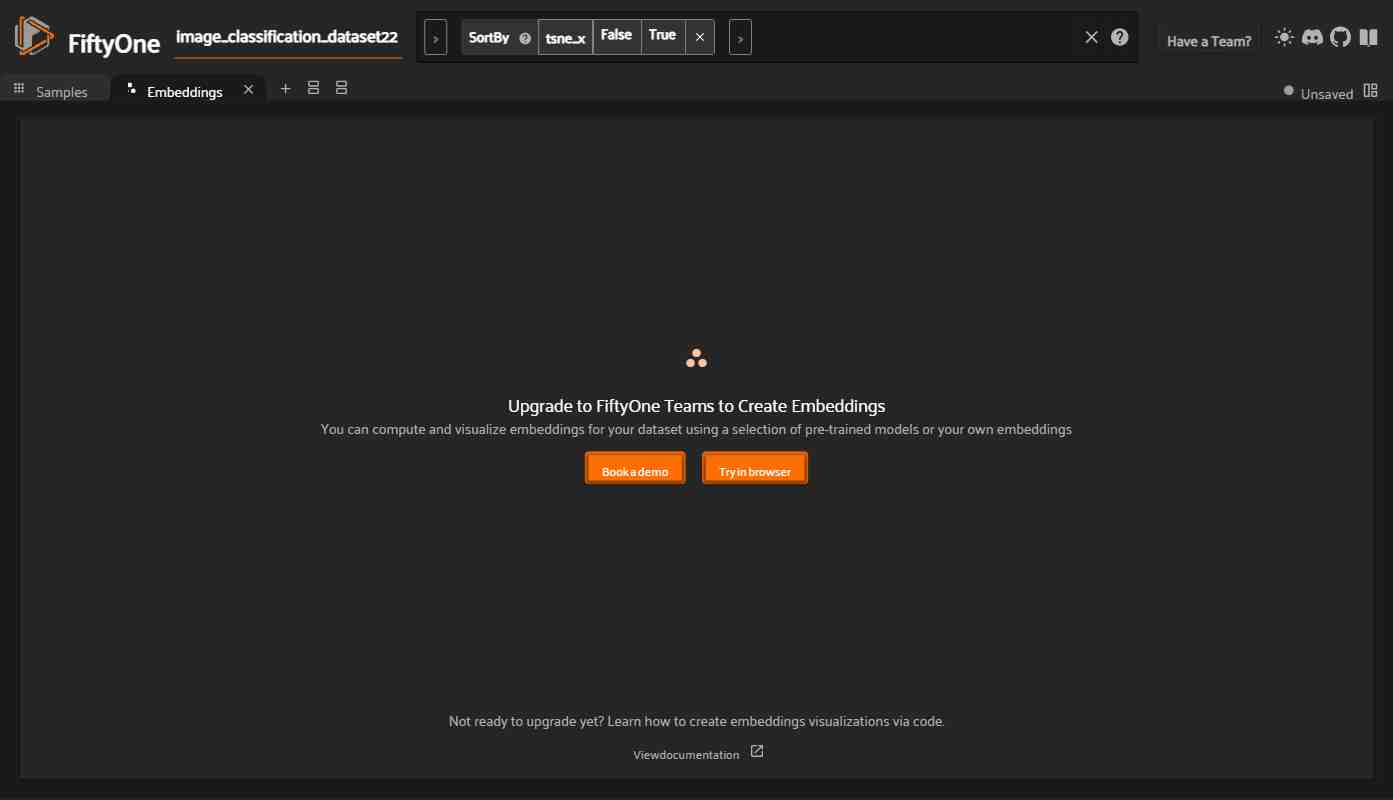

Notebook sessions cannot wait


In [11]:
import fiftyone as fo
import fiftyone.utils.data as foud
import torch
import torchvision.transforms as T
from torchvision.models import resnet50
from PIL import Image
import numpy as np
from tqdm import tqdm

# Path to your folder with images (replace with your folder's path)
base_path = r"data\multi-class-knee-osteoporosis-x-ray-dataset\archive"

# Delete existing dataset if it exists
if "image_classification_dataset" in fo.list_datasets():
    print("Deleting existing dataset...")
    fo.delete_dataset("image_classification_dataset")

# Load the dataset from subfolders
dataset = fo.Dataset.from_dir(
    dataset_dir=base_path,
    dataset_type=fo.types.ImageClassificationDirectoryTree,
    name="image_classification_dataset22"
)

# Launch the FiftyOne App
session = fo.launch_app(dataset)

# Load a pre-trained ResNet50 model
model = resnet50(pretrained=True)
model.eval()

# Remove the final classification layer to use the embeddings
model = torch.nn.Sequential(*list(model.children())[:-1])

# Define the image transformation pipeline
transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to compute embeddings
def compute_embedding(filepath):
    # Load the image using Pillow
    image = Image.open(filepath).convert("RGB")
    input_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        embedding = model(input_tensor)
    return embedding.squeeze().numpy()

# Generate embeddings for all samples
print("Generating embeddings...")
embeddings = []
for sample in tqdm(dataset):
    embedding = compute_embedding(sample.filepath)
    sample["embedding"] = embedding.tolist()  # Convert to list for JSON serialization
    embeddings.append(embedding)
    sample.save()

# Add embeddings to the dataset
embeddings = np.vstack(embeddings)  # Stack all embeddings into a 2D array
labels = list(dataset.values("ground_truth.label"))  # Get labels for all samples

# Apply dimensionality reduction (t-SNE) for visualization
from sklearn.manifold import TSNE

print("Performing t-SNE...")
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

# Add the reduced embeddings as sample fields
for sample, coords in zip(dataset, reduced_embeddings):
    sample["tsne_x"] = coords[0]
    sample["tsne_y"] = coords[1]
    sample.save()

# Visualize the embeddings in the FiftyOne App
session.dataset = dataset
session.view = dataset.sort_by("tsne_x")
session.wait()
